**¿Qué librerías vamos a usar?**
    
    Pandas
    numpy
    matplotlib - mucho
    sklearn.model_selection import train_test_split

**Novedad**
    
    from sklearn import svm

**class sklearn.svm.SVC**(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

**C** float, predeterminado = 1.0
Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva. La penalización es una penalización de 12 al cuadrado.

**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default = ’rbf’
Especifica el tipo de kernel que se utilizará en el algoritmo. Debe ser "lineal", "poli", "rbf", "sigmoide", "precalculado" o invocable. Si no se proporciona ninguno, se utilizará "rbf". Si se proporciona un invocable, se utiliza para calcular previamente la matriz del núcleo a partir de matrices de datos; esa matriz debe ser una matriz de formas (n_samples, n_samples).

**grado**int, predeterminado = 3
Grado de la función del núcleo polinomial ("poli"). Ignorado por todos los demás núcleos.

**gamma** {"scale", "auto"} o flotante, predeterminado = "scale"
Coeficiente de kernel para "rbf", "poli" y "sigmoide".

si se pasa gamma = 'scale' (predeterminado), entonces usa 1 / (n_features * X.var ()) como valor de gamma,

si es "auto", utiliza 1 / n_features.

**coef0** float, predeterminado = 0.0
Término independiente en la función del núcleo. Solo es significativo en "poli" y "sigmoide".

**shrinking** bool, predeterminado = True
Ya sea para usar la heurística de encogimiento. Consulte la Guía del usuario - https://scikit-learn.org/stable/modules/svm.html#shrinking-svm 

**probability** bool, predeterminado = Falso
Ya sea para habilitar estimaciones de probabilidad. Esto debe estar habilitado antes de llamar al ajuste, ralentizará ese método, ya que utiliza internamente una validación cruzada de 5 veces, y predict_proba puede ser inconsistente con predict. 

**tol** float, predeterminado = 1e-3
Tolerancia al criterio de parada.

**cache_size** float, predeterminado = 200
Especifique el tamaño de la caché del kernel (en MB).

**class_weight** None o "balanceado", predeterminado = None
Establezca el parámetro C de la clase i en class_weight [i] * C para SVC. Si no se da, se supone que todas las clases tienen un peso uno. El modo "balanceado" utiliza los valores de y para ajustar automáticamente los pesos inversamente proporcionales a las frecuencias de clase en los datos de entrada como n_samples / (n_classes * np.bincount (y))

**verbose** bool, predeterminado = False
Habilite la salida detallada. Tenga en cuenta que esta configuración aprovecha una configuración de tiempo de ejecución por proceso en lib svm que, si está habilitada, puede no funcionar correctamente en un contexto multiproceso.

**max_iter** int, predeterminado = -1
Límite estricto de iteraciones dentro del solucionador, o -1 si no hay límite.

**decision_function_shape** {‘ovo’, ‘ovr’}, default = ’ovr’
Ya sea para devolver una función de decisión one-vs-rest ('ovr') de shape (n_samples, n_classes) como todos los demás clasificadores, o la función de decisión original one-vs-one ('ovo') de libsvm que tiene shape (n_samples , n_clases * (n_clases - 1) / 2). Sin embargo, uno contra uno ("ovo") siempre se utiliza como estrategia de clases múltiples. El parámetro se ignora para la clasificación binaria.

Modificado en la versión 0.19: decision_function_shape es "ovr" por defecto.

Nuevo en la versión 0.17: se recomienda decision_function_shape = ’ovr’.

Modificado en la versión 0.17: Deprecated decision_function_shape = ’ovo’ y None.

**break_ties**bool, predeterminado = False
Si es verdadero, decision_function_shape = 'ovr', y el número de clases> 2, predict romperá los lazos de acuerdo con los valores de confianza de decision_function; de lo contrario, se devuelve la primera clase entre las clases empatadas. Tenga en cuenta que romper los lazos tiene un costo computacional relativamente alto en comparación con una simple predicción.

Nuevo en la versión 0.22.

**random_state** int, instancia de RandomState o None, predeterminado = None
Controla la generación de números pseudoaleatorios para mezclar los datos para estimaciones de probabilidad. Se ignora cuando la probabilidad es falsa. Pase un int para una salida reproducible a través de múltiples llamadas a funciones

Más colores para gráficos

#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

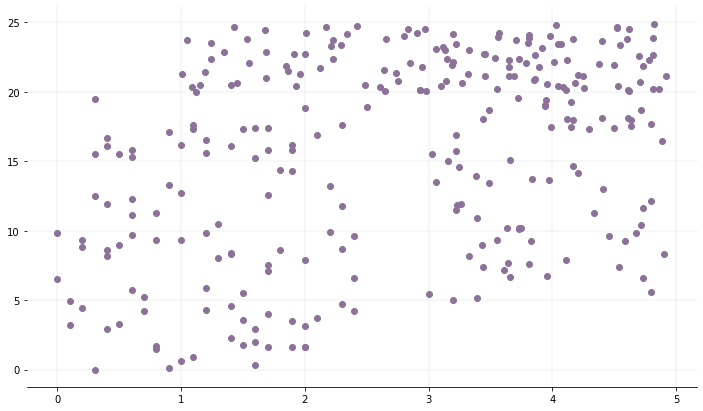

In [10]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def generate_random_dataset(size):
    """ Genere un conjunto de datos aleatorio y que siga una distribución cuadrática
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

# Genero el dataset
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']
# 20 % para testing
test_size = int(np.round(size * 0.2, 0))
# Divido el set en training y test
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values
# Dibujo el set de training
fig, ax = plt.subplots(figsize=(12, 7))
# quitando al borde derecho
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# agregar líneas de cuadrícula principales
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()

In [11]:
from sklearn import svm
#Función Polinómica de Grado 2
model = svm.SVC(kernel='poly', degree=2)
# cambiar el grado 
# Cambiar kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

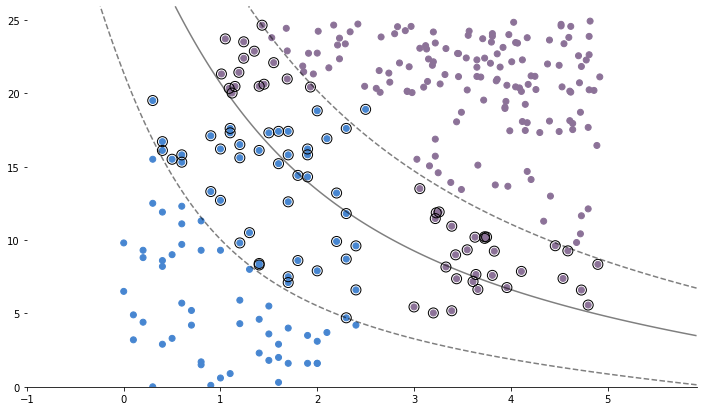

In [12]:
fig, ax = plt.subplots(figsize=(12, 7))
# Eliminando el borde derecho y hacia arriba
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Crear cuadrícula para evaluar el modelo
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Asigno diferentes colores a las clases
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Grafico el Dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Obtengo el Hiperplano
Z = model.decision_function(xy).reshape(XX.shape)
# Dibujar el límite y los márgenes de decisión
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Resalto los vectores de soporte con un círculo alrededor de ellos.
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kernel\nAccuracy (normalized): " + str(accuracy_poly))

2nd degree polynomial Kernel
Accuracy (normalized): 0.95


In [14]:
#¿Qué más nos faltaría medir acá?
Matriz de confusión - Métricas


In [16]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

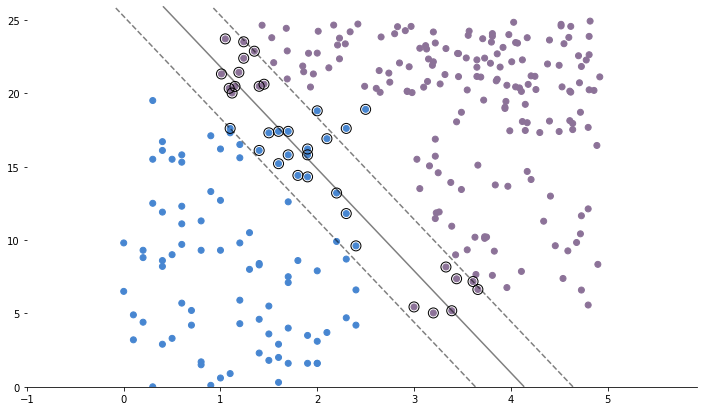

In [17]:
#Vamos a Graficar SMV Lineal
fig, ax = plt.subplots(figsize=(12, 7))
# Eliminando el borde derecho y hacia arriba
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Crear cuadrícula para evaluar el modelo
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Asignar diferentes colores a las clases
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Grafico el dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Obtengo el hiperplano
Z = model.decision_function(xy).reshape(XX.shape)
# Dibujar el límite y los márgenes de decisión
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Resalto los vectores de soporte con un círculo alrededor de ellos
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
predictions_lineal = model.predict(x_test)
accuracy_lineal = accuracy_score(y_test, predictions_lineal)
print("2nd degree lineal Kernel\nAccuracy (normalized): " + str(accuracy_lineal))

2nd degree lineal Kernel
Accuracy (normalized): 0.95


In [9]:
#¿Qué falta medir?

In [ ]:
Matriz de confusión